In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import database
reload(database)
db = database.thomas_18_db

In [3]:
figdir_root='/mnt/home/szheng/ceph/place_variability/fig/explore_imaging/'
figdir = os.path.join(figdir_root,'pv_corr')
figdir= misc.get_or_create_subdir(figdir)

In [4]:
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data')

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [572]:
import fr_map_thomas_all_sess as fmtas
reload(fmtas)
import get_thomas_cell_metrics as gtcm
reload(gtcm)
import unimodal_nmf as unmf

In [574]:
%%time
fr_map_all = fmtas.main(force_reload=False,load_only=False,dosave=True)
fr_map_trial_df_all = fr_map_all['fr_map_trial_df_all']

occu_map = fr_map_all['occu_map_all']

frmap = fr_map_all['fr_map_all']
fr_map_trial_all = fr_map_all['fr_map_trial_all']

cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_0/day_0/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_1/day_0/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_3/day_0/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_4/day_0/fr_map_mask_True.p
cant format into a dataf

cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_13/day_2/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_14/day_2/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_0/day_3/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_10/day_3/fr_map_mask_True.p
cant format into a da

cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/day_0/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_8/day_0/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_9/day_0/fr_map_mask_True.p
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_10/day_0/fr_map_mask_True.p
cant format into a datafram

NameError: name 'rectify' is not defined

In [575]:
# reshape fr_map_trial_df_all to make it easier to work with
fr_map_trial_df_all_day =fr_map_trial_df_all.unstack(level=2).swaplevel(0,1,axis=1).sort_index(axis=1) # day in column

fr_map_trial_df_all_per_uid=fr_map_trial_df_all.unstack(level=(2,3)).swaplevel(0,1,axis=1).swaplevel(1,2,axis=1).sort_index(axis=1).dropna(axis=1,how='all')

frmap_all_day = frmap.unstack(level=2).swaplevel(0,1,axis=1).sort_index(level=0,axis=1)

In [576]:
reload(gtcm)
reload(pa)
per_cell_metrics=gtcm.get_variability_metrics(frmap,occu_map,fr_map_trial_df_all)

/mnt/home/szheng/projects/util_code/place_cell_analysis.py:213: PerformanceWarning: indexing past lexsort depth may impact performance.
  frmap_one=frmap.loc[kk].dropna(axis=1)
/mnt/home/szheng/projects/util_code/place_cell_analysis.py:205: RuntimeWarning: invalid value encountered in true_divide
  div = (fr_map_v / fr_mean[:,None])


# choose some examples

In [36]:
reload(unmf)

<module 'unimodal_nmf' from '/mnt/home/szheng/projects/nmf_analysis/unimodal_nmf.py'>

In [10]:
# select exp with more days
all_ind=  frmap.index.to_frame()
gpb=all_ind.groupby([0,1])
exp_with_more_days=[]
for k,val in gpb:
    if val[2].nunique() >=3:
        exp_with_more_days.append(k)

In [638]:
per_cell_metrics_oneexp = per_cell_metrics.loc[exp_ind,:]
row=per_cell_metrics_oneexp.query('si>1').sample(1)
print(row)
day,isnovel,uid=ind=row.index[0]
region,exp = exp_ind

region = 'CA3'
exp = 0
uid = 21
isnovel = 1

X_df = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid),:].dropna(axis=1,how='all')
X = X_df.fillna(0).values

               si    fr_cv   mean_fr
4 1 845  2.730229  1.98328  0.009449


In [639]:
X_df_ = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid),:].dropna(axis=1,how='all')
# eps=10e-10
# X_df_[X_df_<0] = eps
# X_df_ = np.log(X_df_)
# X_df_ = X_df_ + X_df_.min().min()
norm_factor = np.quantile(X_df_.dropna().values,0.99)
X_df = X_df_ /norm_factor
# (X_df.max().max()*0.9)

In [652]:
reload(unmf)
n_basis = 20
lam_beta=lam_beta_cross = 1.#1.
lam_h = .1 # 0.1
# lam_beta_cross = 10.#0.1
W_hat_ma, H_hat_ma,X_hat, loss_history = unmf.do_unimodal_nmf_wrapper(X_df,ma_thresh=0.1,
                                                                n_components=n_basis,lam_beta=lam_beta,lam_h=lam_h,lam_beta_cross=lam_beta_cross,
                                                                n_basis=n_basis,
                                                                n_iter_max=100,rtol=1e-3,
                                                                verbose=True,
                                                               )

iter0--tot: 63.27365, recon: 52.72251, reg_beta: 0.26583, reg_H: 8.20367, reg_beta_cross: 2.08163
iter1--tot: 52.19380, recon: 40.98304, reg_beta: 1.31802, reg_H: 5.93989, reg_beta_cross: 3.95286
iter2--tot: 51.03145, recon: 38.07699, reg_beta: 1.54542, reg_H: 5.79413, reg_beta_cross: 5.61491
iter3--tot: 50.98853, recon: 37.76327, reg_beta: 1.54826, reg_H: 5.50951, reg_beta_cross: 6.16748
iter4--tot: 50.93976, recon: 37.67438, reg_beta: 1.57142, reg_H: 5.35296, reg_beta_cross: 6.34099
iter5--tot: 50.91750, recon: 37.63582, reg_beta: 1.59605, reg_H: 5.25613, reg_beta_cross: 6.42951
iter6--tot: 50.91402, recon: 37.61463, reg_beta: 1.61773, reg_H: 5.19182, reg_beta_cross: 6.48984
iter7--tot: 50.91920, recon: 37.60160, reg_beta: 1.63561, reg_H: 5.14727, reg_beta_cross: 6.53472
success=True


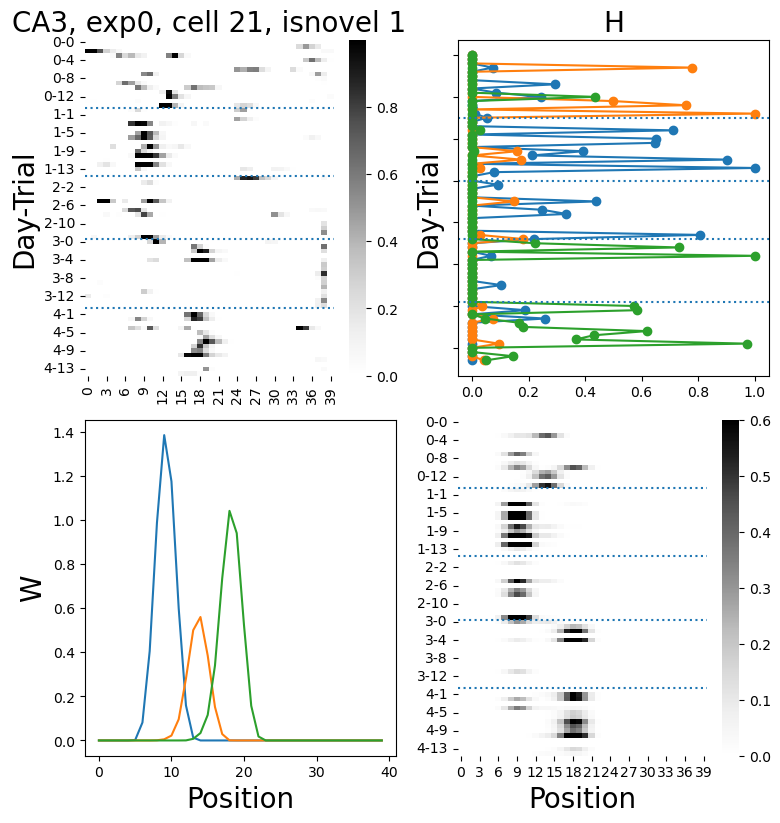

In [653]:
reload(unmf)
fig,axs=unmf.plot_ratemap_and_wh(X_df,W_hat_ma,H_hat_ma,X_hat=X_hat,fig=None,axs=None,
                                region=region,exp=exp,isnovel=isnovel,uid=uid)

# select exp

In [624]:

ii=3
exp_ind = exp_with_more_days[ii]
print(exp_ind)
region,exp = exp_ind
isnovel=0

('CA1', 10)


In [625]:
region = 'CA1'
exp = 9

[Text(0.5, 1.0, 'CA1 exp 9 isnovel 0')]

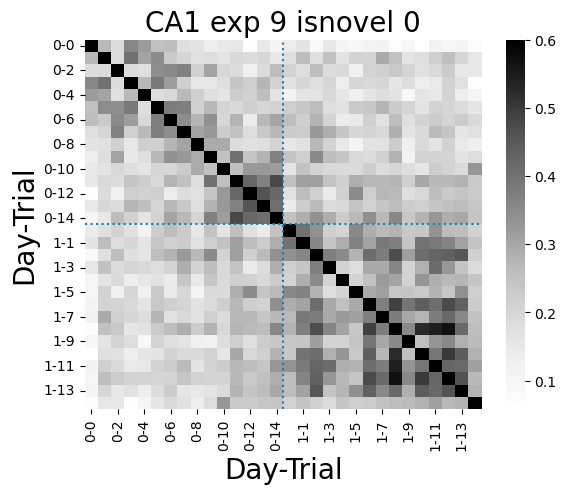

In [626]:
# trial vs trial pvcorr
reload(ph)
fr_map_trial_df_all_day_sub = fr_map_trial_df_all_day.loc[(region,exp,isnovel),:].dropna(axis=1,how='all')
sim_all = fr_map_trial_df_all_day_sub.corr()
fig,ax=plt.subplots()
ax=sns.heatmap(sim_all,cmap='Greys',vmax=0.6)
ph.plot_day_on_heatmap(sim_all,axis=0,level=0,vline=True,hline=True,ax=ax,fig=fig)
ax.set(xlabel='Day-Trial',ylabel='Day-Trial')
title=f'{region} exp {exp} isnovel {isnovel}'
ax.set(title=title)

[Text(0.5, 1.0, 'CA1 exp 9 isnovel 0')]

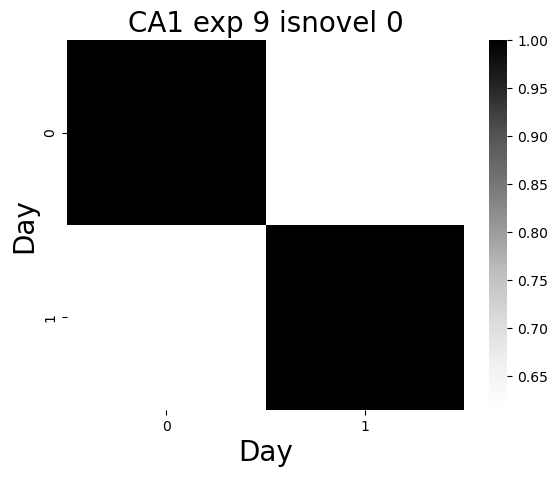

In [627]:
# trial average day vs day pvcorr 
frmap_all_day_sub = frmap_all_day.loc[(region,exp,isnovel),:].stack().dropna(axis=1,how='all')
sim_all = frmap_all_day_sub.corr()
fig,ax=plt.subplots()
ax=sns.heatmap(sim_all,cmap='Greys')
# ph.plot_day_on_heatmap(sim_all,axis=0,level=0,vline=True,hline=True,ax=ax,fig=fig)
ax.set(xlabel='Day',ylabel='Day')
title=f'{region} exp {exp} isnovel {isnovel}'
ax.set(title=title)

# trial average day vs day per neurons

In [601]:
avg_corr_per_cell = frmap_all_day_sub.groupby(level=0).corr()

In [470]:
# avg_corr_per_cell_offdiag = avg_corr_per_cell.groupby(level=0).apply(lambda x:np.mean(x.values[np.triu_indices_from(x,1)]))

In [602]:
%%time
reload(gtcm)
# select one exp
isnovel = 0
fr_map_trial_df_all_day_sub = fr_map_trial_df_all_day.loc[(region,exp,isnovel),:].dropna(axis=1,how='all')

# filter for nicer place cells

# per_cell_metrics_one = per_cell_metrics.loc[(region,exp,slice(None),isnovel),:] # one exp
# per_cell_metrics_one_max = per_cell_metrics_one.groupby(level=4).max() # max across days per cell
# si_thresh = per_cell_metrics_one_max['si'].quantile(0.0)
# ma = per_cell_metrics_one_max['si'] > si_thresh
# uid_inds=ma.index[ma]
# fr_map_trial_df_all_day_sub = fr_map_trial_df_all_day_sub.loc[uid_inds]

# loop get beg end corr
gpb = fr_map_trial_df_all_day_sub.groupby(level=0)
beg_end_corr_all = {}
diff_l_all = {}
end_beg_l_all = {}
beg_end_mean_l_all = {}
for uid,val in gpb:
# X_df_ = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid),:].dropna(axis=1,how='all')
    X_df_ = val.loc[uid]
    sim = X_df_.corr()
#     beg_end_corr=gtcm.get_begin_end_corr(sim,n_tr=3,day_level=0)
#     beg_end_corr_all[uid] = beg_end_corr
#     diff_l,end_beg_l,beg_end_mean_l = gtcm.get_beg_end_diff_minus_end_begin_same(beg_end_corr,day_level=0)
    diff_l,end_beg_l,beg_end_mean_l = gtcm.get_beg_end_diff_minus_end_begin_same_direct(sim,day_level=0)
    end_beg_l_all[uid] = end_beg_l
    beg_end_mean_l_all[uid] = beg_end_mean_l
    diff_l_all[uid] = diff_l
# beg_end_corr_all = pd.concat(beg_end_corr_all,axis=0)
diff_l_all = pd.DataFrame(diff_l_all).T
end_beg_l_all = pd.DataFrame(end_beg_l_all).T
beg_end_mean_l_all = pd.DataFrame(beg_end_mean_l_all).T

beg_end_corr_diff_df=pd.concat({'end_beg_across':end_beg_l_all.stack(),
'beg_end_same':beg_end_mean_l_all.stack(),'diff':diff_l_all.stack()},axis=1)
beg_end_corr_diff_df['across_bigger']=beg_end_corr_diff_df['diff'] > 0 

CPU times: user 2.66 s, sys: 0 ns, total: 2.66 s
Wall time: 2.66 s


In [603]:
scipy.stats.wilcoxon(beg_end_corr_diff_df.unstack(level=1).dropna(axis=0)['diff'],alternative='greater')

WilcoxonResult(statistic=array([14078.]), pvalue=array([0.41911163]))

[Text(0.5, 1.0, 'CA1 exp 9 isnovel 0\n wilcoxon p=4.19e-01, frac=0.50')]

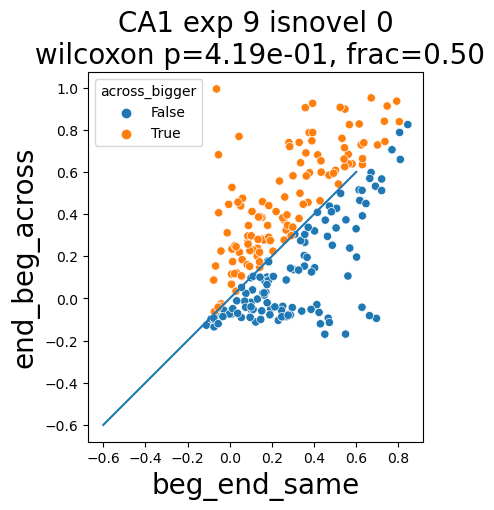

In [604]:
fig,ax=plt.subplots()
ax.set_aspect('equal')
# toplot=beg_end_corr_diff_df.loc[(slice(None),1),:]
toplot=beg_end_corr_diff_df.dropna(axis=0)
x='beg_end_same'
y='end_beg_across'
sns.scatterplot(data=toplot,x=x,y=y,hue='across_bigger',ax=ax)
ax.plot([-0.6,0.6],[-0.6,0.6])

uval,pval=scipy.stats.wilcoxon(toplot[x],toplot[y],alternative='less')
frac = toplot['across_bigger'].mean()
title=f'{region} exp {exp} isnovel {isnovel}\n wilcoxon p={pval:.2e}, frac={frac:.2f}'
ax.set(title=title)

In [12]:
# beg end corr with shuffle

In [352]:
ma = (beg_end_corr_diff_df['diff']>0.3) & (beg_end_corr_diff_df['end_beg_across']>0)
uid_ind_across_bigger=beg_end_corr_diff_df.loc[ma].index.get_level_values(0).unique()

In [375]:
# # seperated by days
# # filter by end_beg_across and across day average drift
# avg_corr_per_cell_offdiag_vals = avg_corr_per_cell.groupby(level=0).apply(lambda x:pd.Series(np.diag(x.values,1)))
# avg_corr_per_cell_offdiag_vals = pd.DataFrame(avg_corr_per_cell_offdiag_vals).stack()

# ma = (beg_end_corr_diff_df['diff']>0.3) & (beg_end_corr_diff_df['end_beg_across']>0) & (avg_corr_per_cell_offdiag_vals < 0.2)
# uid_ind_across_bigger=beg_end_corr_diff_df.loc[ma].index.get_level_values(0).unique()



In [353]:
# # further filter to get the on average drifting cells
# avg_drift_ma = avg_corr_per_cell_offdiag < 0.2
# avg_drift_ma = avg_drift_ma.index[avg_drift_ma]

# uid_ind_across_bigger = avg_drift_ma.intersection(uid_ind_across_bigger)

In [605]:
# filter by high end_beg_across and low beg_end_same
ma = (beg_end_corr_diff_df['end_beg_across'] > 0.4) & (beg_end_corr_diff_df['beg_end_same'] < 0.1)
uid_ind_across_bigger=beg_end_corr_diff_df.loc[ma].index.get_level_values(0).unique()
uid_ind_across_bigger

Int64Index([129, 171, 194, 202, 219, 283, 404, 468, 560], dtype='int64')

In [623]:
exp

10

In [628]:
isnovel = 0
per_cell_metrics_oneexp = per_cell_metrics.loc[(region,exp),:]
per_cell_metrics_oneexp_sub=per_cell_metrics_oneexp.loc[(slice(None),isnovel,uid_ind_across_bigger),:].query('si>1')
row=per_cell_metrics_oneexp_sub.sample(1)

print(row)
day,isnovel,uid=ind=row.index[0]

uid = uid_ind_across_bigger.to_series().sample().values[0]
uid = 302

# region,exp = exp_ind
X_df_ = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid),:].dropna(axis=1,how='all')


               si     fr_cv   mean_fr
1 0 283  1.604643  2.340479  0.042374


In [630]:
%%time
sim = X_df_.corr()
beg_end_corr=gtcm.get_begin_end_corr(sim,n_tr=3,day_level=0)
# diff_l,end_beg_l,beg_end_mean_l = gtcm.get_beg_end_diff_minus_end_begin_same(beg_end_corr,day_level=0)
reload(gtcm)
diff_l, end_beg_l, beg_end_mean_l=gtcm.get_end_beg_diff_minus_beg_end_same_direct(sim,n_tr=3,day_level=0)

CPU times: user 31.3 ms, sys: 31 µs, total: 31.3 ms
Wall time: 36.7 ms


In [631]:
diff_l

array([-0.05234391])

(None, <Axes: xlabel='Position'>)

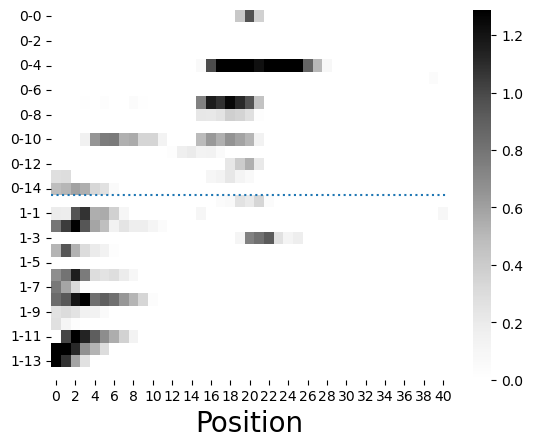

In [637]:
fig,ax=ph.heatmap(X_df_.T,vmax_quantile=0.99)
# _=ax.set_yticklabels([])
ph.plot_day_on_heatmap(X_df_.T,ax=ax)

/tmp/ipykernel_648676/1389724997.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


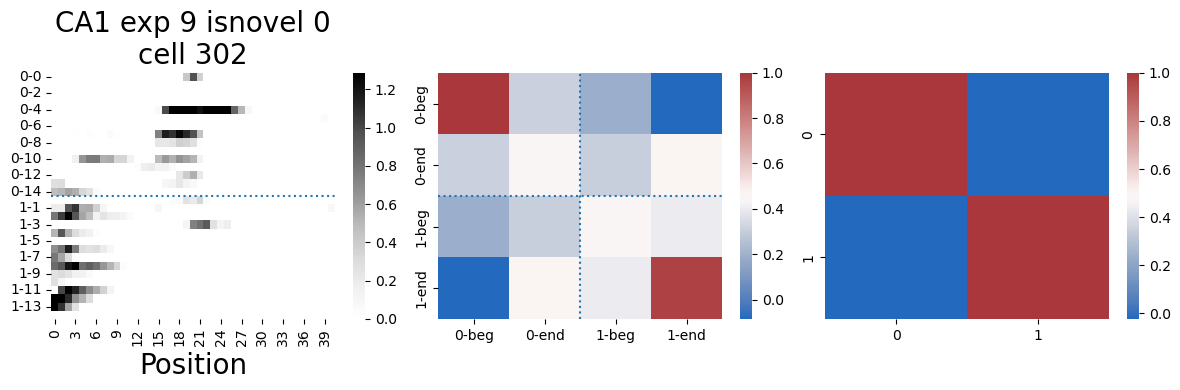

In [632]:
fig,axs=plt.subplots(1,3,figsize=(12,4))
ax=axs[0]
fig,ax=ph.heatmap(X_df_.T,ax=ax,vmax_quantile=0.99)
ph.plot_day_on_heatmap(X_df_.T,ax=ax)
title=f'{region} exp {exp} isnovel {isnovel}\ncell {uid}'
ax.set(title=title)

ax=axs[1]
sns.heatmap(beg_end_corr,ax=ax,cmap='vlag')
ph.plot_day_on_heatmap(beg_end_corr,vline=True,ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()

ax=axs[2]
x_avg=frmap_all_day.loc[(region,exp,isnovel,uid)].unstack(level=0).dropna(axis=1,how='all')
avg_sim=x_avg.corr()
sns.heatmap(avg_sim,ax=ax,cmap='vlag')
# ph.plot_day_on_heatmap(beg_end_corr,vline=True,ax=ax)
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()



CPU times: user 4.73 s, sys: 168 ms, total: 4.9 s
Wall time: 4.57 s


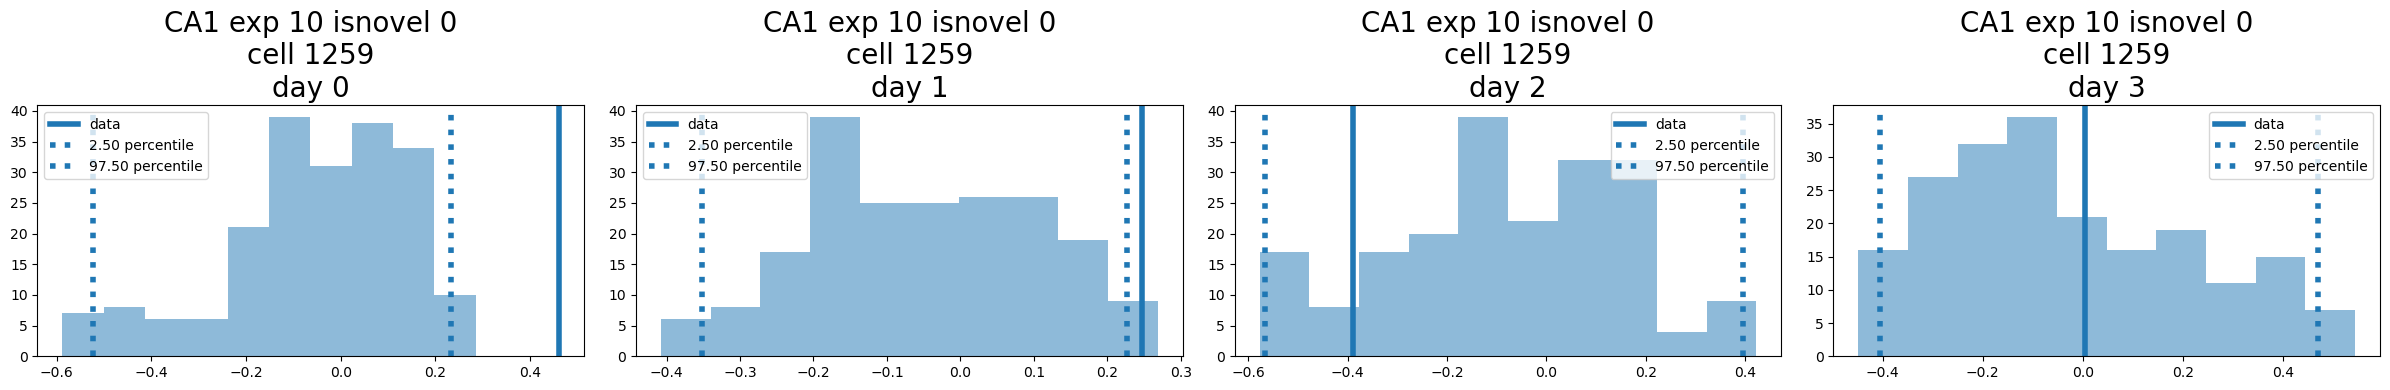

In [478]:
%%time
n_roll_min = 2
diff_l_sh_l = []
nrepeats = 200
for i in range(nrepeats):
    trial_ind_roll = sim.index.to_frame().groupby(0).apply(lambda x:pd.DataFrame(np.roll(x,np.random.randint(n_roll_min,len(x)-n_roll_min),axis=0)))
    trial_ind_roll = pd.MultiIndex.from_frame(pd.DataFrame(trial_ind_roll))

    sim_reind = sim.loc[trial_ind_roll,trial_ind_roll]
#     beg_end_corr_sh=gtcm.get_begin_end_corr(sim_reind,n_tr=3,day_level=0)
    diff_l_sh,end_beg_l_sh,beg_end_mean_l_sh = gtcm.get_beg_end_diff_minus_end_begin_same_direct(sim_reind,n_tr=3,day_level=0)
    diff_l_sh_l.append(diff_l_sh)
diff_l_sh_l = np.array(diff_l_sh_l)

nplots=diff_l_sh_l.shape[1]
fig,axs=plt.subplots(1,nplots,figsize=(6*nplots,4))
for k in range(nplots):
    ax=axs[k]
    ph.plot_shuffle_data_dist_with_thresh(diff_l_sh_l[:,k],diff_l[k],ax=ax,plot_ci_low=True)
    title=f'{region} exp {exp} isnovel {isnovel}\ncell {uid}\nday {k}'
    ax.set_title(title)
plt.tight_layout()

In [434]:
reload(gtcm)

<module 'get_thomas_cell_metrics' from '/mnt/home/szheng/projects/place_variability/code/thomas_18_data/get_thomas_cell_metrics.py'>

In [484]:
%%time
reload(gtcm)
# shuffle test the promising ones
ma = (beg_end_corr_diff_df['end_beg_across'] > 0 ) & (beg_end_corr_diff_df['diff'] > 0 )
uid_selected = beg_end_corr_diff_df.loc[ma].index.get_level_values(0).unique()

fr_map_trial_df_all_day_sub = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid_selected),:].dropna(axis=1,how='all').droplevel((0,1,2))
gpb = fr_map_trial_df_all_day_sub.groupby(level=0)
pval_d = {}
for uid,val in gpb:
    sim = val.corr()
    pval = gtcm.shuffle_test_end_beg_diff_minus_beg_end_same(sim,n_roll_min=2,nrepeats = 200)
    pval_d[uid] = pval


    

CPU times: user 1h 42min 46s, sys: 630 ms, total: 1h 42min 47s
Wall time: 1h 42min 47s


In [485]:
pval_d = pd.DataFrame(pval_d).T

In [486]:
import pickle
data_dir = '/mnt/home/szheng/ceph/place_variability/data/thomas18'
savefn = f'{region}_exp{exp}_isnove{isnovel}_end_beg_across_minus_beg_end_same_shuffle.p'
savefn = os.path.join(data_dir,savefn)
pickle.dump(pval_d,open(savefn,'wb'))

In [499]:
ntot=beg_end_corr_diff_df.index.get_level_values(0).nunique()
print(ntot)

1630


In [494]:
pthresh = 0.05 / pval_d.shape[1]
(pval_d < pthresh).sum() / ntot

0    0.086503
1    0.081595
2    0.052147
3    0.009202
dtype: float64

In [495]:
(pval_d < pthresh).all(axis=1).sum()/ntot

0.0

In [496]:
(pval_d < pthresh).any(axis=1).sum()/ntot

0.2116564417177914

In [497]:
(pval_d > (1-pthresh)).any(axis=1).sum()/ntot

0.21901840490797547

In [498]:
exp

10

CPU times: user 2.47 s, sys: 0 ns, total: 2.47 s
Wall time: 2.47 s


In [66]:
diff_l_sh

array([-0.15122431, -0.34361096, -0.0687398 , -0.52480335])

In [387]:
uval

87876.0

In [283]:
fr_map_trial_df_all_day_sub

0                                                              \
              0         1         2         3         4         5         6    
0   0   0.002285  0.142994 -0.012919  0.088575  0.036608 -0.015242  0.891686   
    1  -0.001521  0.137304 -0.010284  0.074993  0.040211 -0.011479  0.878093   
    2  -0.006707  0.125414 -0.007383  0.052601  0.047316 -0.005062  0.846634   
    3  -0.010646  0.106106 -0.006436  0.028327  0.057326  0.002558  0.792081   
    4  -0.011679  0.078190 -0.008672  0.008001  0.068751  0.010248  0.711596   
...          ...       ...       ...       ...       ...       ...       ...   
429 35 -0.008361 -0.002742 -0.040234 -0.000751 -0.001494  0.010479  0.057577   
    36  0.009680 -0.000968 -0.029998  0.005606 -0.010836  0.023809  0.068186   
    37  0.021657 -0.002186 -0.021500  0.009517 -0.019689  0.031642  0.075234   
    38  0.027485 -0.003998 -0.016409  0.011306 -0.025144  0.035021  0.078740   
    39       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                      ...   4                                  \
              7         8         9   ...  24  25  26  27  28  29  30  31  32   
0   0   0.110290 -0.002478  0.021156  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    1   0.110428 -0.001262  0.018794  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    2   0.110674 -0.000023  0.015034  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    3   0.110979 -0.000037  0.011155  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    4   0.111300 -0.001354  0.008095  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...          ...       ...       ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
429 35  0.000000  0.166028  0.066973  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    36  0.000000  0.188279  0.069320  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    37  0.000000  0.205132  0.071220  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    38  0.000000  0.216314  0.072356  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    39       NaN       NaN       NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

            
        33  
0   0  NaN  
    1  NaN  
    2  NaN  
    3  NaN  
    4  NaN  
...     ..  
429 35 NaN  
    36 NaN  
    37 NaN  
    38 NaN  
    39 NaN  

[17200 rows x 170 columns]

In [275]:
reload(gtcm)
beg_end_corr=gtcm.get_begin_end_corr(sim,n_tr=3,day_level=0)

In [279]:
beg_end_corr

0                   1                   2          
            beg       end       beg       end       beg       end
0 beg  0.489858 -0.047281 -0.350855  0.196391  0.428903  0.151999
  end -0.047281  0.300109  0.105601 -0.132944 -0.262602  0.071979
1 beg -0.350855  0.105601  0.498116 -0.040761 -0.443181  0.137261
  end  0.196391 -0.132944 -0.040761  0.338670  0.363786  0.192644
2 beg  0.428903 -0.262602 -0.443181  0.363786  0.915520 -0.009703
  end  0.151999  0.071979  0.137261  0.192644 -0.009703  0.383321

In [280]:
reload(gtcm)
diff_l = gtcm.get_beg_end_diff_minus_end_begin_same(beg_end_corr,day_level=0)

In [281]:
diff_l

array([0.14962184, 0.38901765])

In [276]:

beg_end_corr

0                   1                   2          
            beg       end       beg       end       beg       end
0 beg  0.489858 -0.047281 -0.350855  0.196391  0.428903  0.151999
  end -0.047281  0.300109  0.105601 -0.132944 -0.262602  0.071979
1 beg -0.350855  0.105601  0.498116 -0.040761 -0.443181  0.137261
  end  0.196391 -0.132944 -0.040761  0.338670  0.363786  0.192644
2 beg  0.428903 -0.262602 -0.443181  0.363786  0.915520 -0.009703
  end  0.151999  0.071979  0.137261  0.192644 -0.009703  0.383321

In [270]:
day_l = sim.columns.get_level_values(0).unique()
n_tr = 3
tr_l ={'beg':slice(0,n_tr),'end':slice(-n_tr,None)}
beg_end_corr = {}
for d1 in day_l:
    for d2 in day_l:
        for k1,tr1 in tr_l.items():
            for k2,tr2 in tr_l.items():        
#                 corr=sim.loc[(d1,slice(None)),(d2,slice(None))].iloc[:n_tr,-n_tr:].mean().mean()
                corr=sim.loc[(d1,slice(None)),(d2,slice(None))].iloc[tr1,tr2].mean().mean()
                beg_end_corr[d1,d2,k1,k2]=corr

beg_end_corr = pd.Series(beg_end_corr).unstack(level=1).unstack()

In [271]:
beg_end_corr

0                   1                   2          
            beg       end       beg       end       beg       end
0 beg  0.489858 -0.047281 -0.350855  0.196391  0.428903  0.151999
  end -0.047281  0.300109  0.105601 -0.132944 -0.262602  0.071979
1 beg -0.350855  0.105601  0.498116 -0.040761 -0.443181  0.137261
  end  0.196391 -0.132944 -0.040761  0.338670  0.363786  0.192644
2 beg  0.428903 -0.262602 -0.443181  0.363786  0.915520 -0.009703
  end  0.151999  0.071979  0.137261  0.192644 -0.009703  0.383321

0                                                              \
            0         1         2         3         4         5         6    
0 0   1.000000  0.384723  0.214558  0.458980  0.158172  0.453371  0.707458   
  1   0.384723  1.000000  0.105082 -0.127913  0.533386  0.583524  0.123527   
  2   0.214558  0.105082  1.000000  0.417073  0.280000  0.485953 -0.012747   
  3   0.458980 -0.127913  0.417073  1.000000 -0.481778 -0.184825  0.725804   
  4   0.158172  0.533386  0.280000 -0.481778  1.000000  0.749529 -0.417898   
  5   0.453371  0.583524  0.485953 -0.184825  0.749529  1.000000 -0.220442   
  6   0.707458  0.123527 -0.012747  0.725804 -0.417898 -0.220442  1.000000   
  7  -0.296845 -0.747490  0.079494  0.451379 -0.582343 -0.697564  0.106340   
  8   0.161797  0.512754  0.412245  0.407454  0.085163  0.356254  0.202033   
  9  -0.035510 -0.048717 -0.339277  0.152867 -0.596397 -0.450787  0.465620   
  10 -0.018310 -0.374304 -0.696206  0.044057 -0.390959 -0.741836  0.399923   
1 0  -0.224700 -0.590853 -0.669285  0.051073 -0.635639 -0.706289  0.163610   
  1  -0.515549 -0.561070  0.357823  0.128781 -0.155542 -0.345221 -0.348647   
  2   0.103929 -0.554471 -0.503520  0.412830 -0.738878 -0.787610  0.605173   
  3   0.286437 -0.183713 -0.726240  0.042214 -0.314108 -0.396750  0.480005   
  4   0.722674  0.849988  0.080974 -0.030837  0.491329  0.645585  0.383580   
  5   0.560261 -0.273369  0.061032  0.578273 -0.526933 -0.316592  0.773893   
  6   0.162467 -0.728214  0.135928  0.581003 -0.529580 -0.515688  0.409997   
  7   0.282991  0.529316  0.690556  0.499961  0.068877  0.417102  0.280082   
  8  -0.069560 -0.141501  0.899702  0.113713  0.292239  0.424541 -0.332632   
  9  -0.132124 -0.196838  0.347638  0.628906 -0.163205 -0.306156  0.173245   
  10  0.316018 -0.588086 -0.124992  0.535059 -0.653332 -0.589116  0.641757   
  11 -0.249824 -0.706958  0.070123  0.602524 -0.611470 -0.680059  0.200262   
  12  0.411358  0.245054  0.904393  0.508358  0.254915  0.502381  0.139588   
  13  0.020776 -0.708877 -0.033893  0.540706 -0.519680 -0.530504  0.277860   
  14  0.052432  0.179513  0.696762 -0.125412  0.555609  0.530592 -0.263179   
2 0   0.128589  0.430414  0.668383 -0.002573  0.569096  0.564686 -0.196885   
  1   0.305808  0.530329  0.722051 -0.063835  0.630485  0.760315 -0.133768   
  2   0.173553  0.198406  0.702592 -0.024844  0.552073  0.486147 -0.199743   
  3  -0.136796  0.510574  0.637303 -0.211799  0.614748  0.719600 -0.500718   
  4   0.552298  0.888248  0.374468 -0.002936  0.562441  0.778002  0.175413   
  5   0.493055  0.565240  0.313751 -0.346169  0.777789  0.865728 -0.170685   
  6   0.814003  0.248779 -0.026108  0.487525 -0.052895  0.261538  0.667961   
  7   0.661342  0.411384  0.665581  0.686464  0.107144  0.453688  0.562445   
  8   0.901623  0.503303  0.272289  0.560130 -0.042329  0.342247  0.787114   
  9   0.554174  0.279850  0.664945  0.838061 -0.127496  0.209299  0.631469   
  10  0.584264  0.707543  0.002203 -0.038210  0.325094  0.640514  0.261622   
  11  0.798031  0.560512  0.632728  0.463228  0.324807  0.571276  0.531552   
  12 -0.279851 -0.567397 -0.171896  0.534617 -0.701949 -0.664050  0.211306   
  13 -0.047250  0.149338  0.765807  0.244887  0.280451  0.546021 -0.348119   
  14  0.562145  0.502875  0.840854  0.396337  0.405085  0.723073  0.200778   
  15  0.449561  0.563978 -0.335330 -0.524781  0.631841  0.546770 -0.034564   
  16  0.765338  0.088597 -0.173140  0.242773 -0.112704  0.108118  0.639191   
  17  0.393644  0.354154  0.120410 -0.428233  0.457286  0.625619 -0.140488   
  18 -0.284233 -0.739330  0.056966  0.416952 -0.559032 -0.694421  0.102695   
  19  0.710741  0.413870  0.715465  0.531658  0.157315  0.510964  0.541102   
  20  0.754876 -0.110135 -0.150230  0.543896 -0.364833 -0.102177  0.794331   

                                    ...         2                      \
            7         8         9   ...        11        12        13   
0 0  -0.296845  0.161797 -0.035510  ...  0.7

<Axes: >

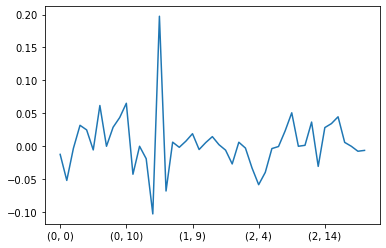

In [237]:
X_df_.loc[33:39].mean().plot()